<a href="https://colab.research.google.com/github/John-Wambua/AI_task/blob/main/Language_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, Sequential
import re
import io
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense

In [87]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### The Data

In [88]:
# data = pd.read_csv(io.BytesIO(uploaded['Language Detection.csv']))
data = pd.read_csv('../content/drive/MyDrive/Language Detection.csv')

In [89]:
data.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [90]:
data['Language'].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [91]:
languages = data['Language'].unique()

In [92]:
languages

array(['English', 'Malayalam', 'Hindi', 'Tamil', 'Portugeese', 'French',
       'Dutch', 'Spanish', 'Greek', 'Russian', 'Danish', 'Italian',
       'Turkish', 'Sweedish', 'Arabic', 'German', 'Kannada'], dtype=object)

**Separate the Dependent from Independent Variable**

In [93]:
X = data["Text"]
y = data["Language"]

## Text Preprocessing

**Encode the Language categories**

In [94]:
y = pd.get_dummies(y).values

In [95]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [96]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y = le.fit_transform(y)

In [97]:
X.values

array([' Nature, in the broadest sense, is the natural, physical, material world or universe.',
       '"Nature" can refer to the phenomena of the physical world, and also to life in general.',
       'The study of nature is a large, if not the only, part of science.',
       ...,
       "ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎಲ್ಲವನ್ನೂ ಹೇಳಿದೆ ಮತ್ತು ಅವಳು ಆ ಸಮಯದಿಂದ ತುಂಬಾ ಬದಲಾಗಿದ್ದಾಳೆ.",
       'ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ನಾನು ess ಹಿಸಿದ್ದೇನೆ.',
       'ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣುತ್ತಿದ್ದೀರಿ ಆದರೆ ನಾನು ಏನು ನೋಡುತ್ತಿದ್ದೇನೆ ನೀವು ಹೇಗೆ ಅವನಾಗಬಹುದು ನೀವು ಇಬ್ಬರು ತುಂಬಾ ಒಳ್ಳೆಯವರು'],
      dtype=object)

**Standardization and Text Cleaning**

In [98]:
corpus_list=[]
for text in X:
    text=str(text)
    text = text.lower()
    text=text.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', text)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    corpus_list.append(rem_num)

In [99]:
len(corpus_list)

10337

In [100]:
tokenizer = Tokenizer()

In [101]:
tokenizer.fit_on_texts(list(X.values))

In [102]:
X = tokenizer.texts_to_sequences(X.values)

In [103]:
X

[[83, 7, 3, 11211, 4936, 21, 3, 703, 2716, 1387, 959, 114, 2717],
 [83, 151, 8007, 13, 3, 11212, 8, 3, 2716, 959, 10, 235, 13, 323, 7, 730],
 [3, 787, 8, 83, 21, 2, 1188, 254, 201, 3, 515, 467, 8, 603],
 [1303,
  2718,
  91,
  467,
  8,
  83,
  547,
  8008,
  21,
  731,
  4937,
  40,
  2,
  4136,
  4137,
  149,
  272,
  703,
  11212],
 [183,
  3,
  413,
  83,
  21,
  11213,
  149,
  3,
  8009,
  6075,
  83,
  10,
  21,
  11214,
  149,
  3,
  2719,
  413,
  2203,
  114,
  8010,
  18320,
  18321,
  11215,
  10,
  7,
  11216,
  1000,
  11217,
  18322,
  18323],
 [239,
  7,
  11216,
  4138,
  2203,
  21,
  3510,
  414,
  40,
  3,
  2719,
  6076,
  8,
  3,
  18324,
  413,
  18325,
  11218,
  187,
  3511,
  914,
  13,
  3,
  18326,
  8011,
  33,
  1990,
  1697,
  10,
  272,
  1189,
  8,
  3,
  959,
  4938,
  8,
  372,
  2442,
  11219],
 [251,
  328,
  3,
  1826,
  8,
  83,
  40,
  2,
  4139,
  3,
  2716,
  2717,
  21,
  293,
  8,
  817,
  18327,
  8,
  3,
  1304,
  1698,
  183,
  117,
  3512

**Find the maximum number of words in a text**

In [104]:
max_word_count = 0
word_count = []
#
for encoded_text in X:
    word_count.append(len(encoded_text))
    if len(encoded_text) > max_word_count:
        max_word_count = len(encoded_text)
print("Maximum number of word in one text: " + str(max_word_count) + " words")

Maximum number of word in one text: 3770 words


In [105]:
X = pad_sequences(X, maxlen=max_word_count, padding='post')

**Get Vocab Size**

In [106]:
vocab_size = len(tokenizer.word_index)+1

In [107]:
vocab_size

48707

## Train Test Split

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=101)

## Running ML Algorithms

## Deep Model

**Create the Model**

In [109]:
y_train.shape

(7235, 17)

In [110]:
X_train.shape

(7235, 3770)

In [111]:
model = Sequential()
model.add(layers.Embedding(vocab_size, output_dim=32, input_length=max_word_count, mask_zero=True))
model.add(layers.LSTM(100))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(17, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 3770, 32)          1558624   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                6464      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_7 (Dense)              (None, 17)                289       
Total params: 1,621,185
Trainable params: 1,621,185
Non-trainable params: 0
____________________________________________

**Train Model**

In [112]:
model.fit(
    X_train, y_train, 
    validation_data=(X_test, y_test),
    epochs=10, batch_size=15
    )

Epoch 1/10
483/483 [==============================] - 23s 39ms/step - loss: 1.8159 - accuracy: 0.3616 - val_loss: 1.0201 - val_accuracy: 0.6199
Epoch 2/10
483/483 [==============================] - 15s 30ms/step - loss: 0.7624 - accuracy: 0.7064 - val_loss: 0.5848 - val_accuracy: 0.8030
Epoch 3/10
483/483 [==============================] - 15s 31ms/step - loss: 0.3537 - accuracy: 0.8809 - val_loss: 0.4710 - val_accuracy: 0.8640
Epoch 4/10
483/483 [==============================] - 17s 35ms/step - loss: 0.1598 - accuracy: 0.9585 - val_loss: 0.4235 - val_accuracy: 0.8875
Epoch 5/10
483/483 [==============================] - 15s 32ms/step - loss: 0.0587 - accuracy: 0.9871 - val_loss: 0.4085 - val_accuracy: 0.9049
Epoch 6/10
483/483 [==============================] - 15s 32ms/step - loss: 0.0262 - accuracy: 0.9964 - val_loss: 0.5279 - val_accuracy: 0.8881
Epoch 7/10
483/483 [==============================] - 17s 34ms/step - loss: 0.0229 - accuracy: 0.9963 - val_loss: 0.4884 - val_accuracy:

In [113]:
_,val_acc=model.evaluate(X_test,y_test,batch_size=128)
print(val_acc)

25/25 [==============================] - 2s 52ms/step - loss: 0.4140 - accuracy: 0.9184
0.9184397459030151


In [114]:
predicted = model.predict(X_test)

In [115]:
y_pred = predicted.argmax(axis=-1)

In [116]:
y_test.argmax(axis=-1) 

array([10,  5,  3, ..., 11, 13, 14])

In [117]:
acc_score = accuracy_score(y_test.argmax(axis=-1), y_pred)
auc_score = roc_auc_score(y_test.argmax(axis=-1), predicted, multi_class="ovr")

**Classification Report**

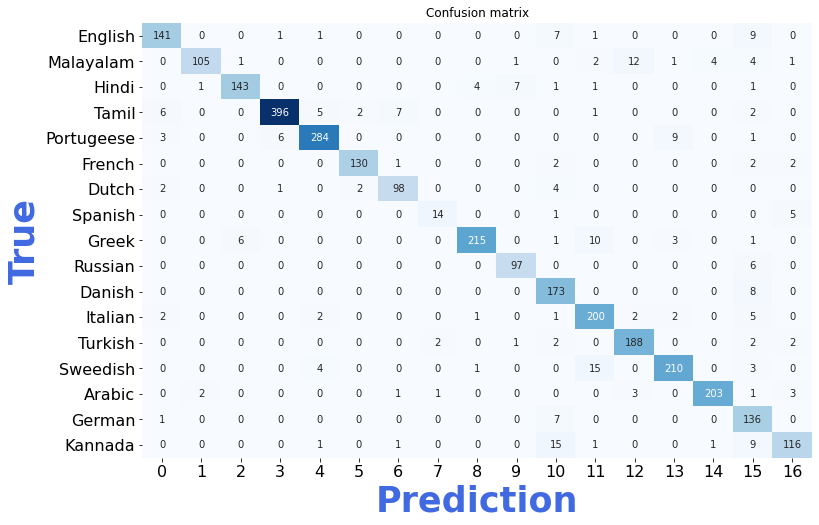

In [118]:
cm = confusion_matrix(y_test.argmax(axis=-1) , y_pred)
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, cbar=False)
ax.set(yticklabels=list(languages), title="Confusion matrix")
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.set_ylabel("True", color="royalblue", fontsize=35, fontweight=700)
ax.set_xlabel("Prediction", color="royalblue", fontsize=35, fontweight=700)
plt.yticks(rotation=0);

In [119]:
#sample_comment=['I do not realy hate this movie']
sample_text=["L'apprendimento automatico è una branca dell'intelligenza artificiale (AI) e dell'informatica che si concentra sull'uso di dati e algoritmi per imitare il modo in cui gli esseri umani apprendono, migliorandone gradualmente la precisione."]
sample_token=tokenizer.texts_to_sequences(sample_text)
sample_token_pad=pad_sequences(sample_token,maxlen=100)
prediction=model.predict(sample_token_pad)
prediction

array([[1.8581349e-18, 2.4385564e-15, 9.7864859e-07, 1.6723858e-22,
        2.0990580e-15, 1.0080253e-33, 8.0378874e-31, 2.1415448e-22,
        9.9961406e-01, 9.6872828e-19, 1.9943356e-37, 3.0895227e-04,
        8.5029503e-25, 7.6043427e-05, 4.6556279e-24, 5.2523759e-20,
        5.9143954e-29]], dtype=float32)

In [120]:
languages[np.argmax(prediction)]

'Greek'